# House price prediction datsset 
# simple linear regression problem


In [3]:
# step 1. import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# step 2. seed dataset
# Create a simple dataset
np.random.seed(42)
area = np.random.randint(500, 3500, 100)  # Square footage
price = area * 50 + np.random.randint(-20000, 20000, 100)  # Price with some noise

# Convert to DataFrame
data = pd.DataFrame({'Area': area, 'Price': price})

# Display the first few rows
print(data.head())


   Area   Price
0  1360   50027
1  1794   72395
2  1630   66758
3  1595   81752
4  2138  126404


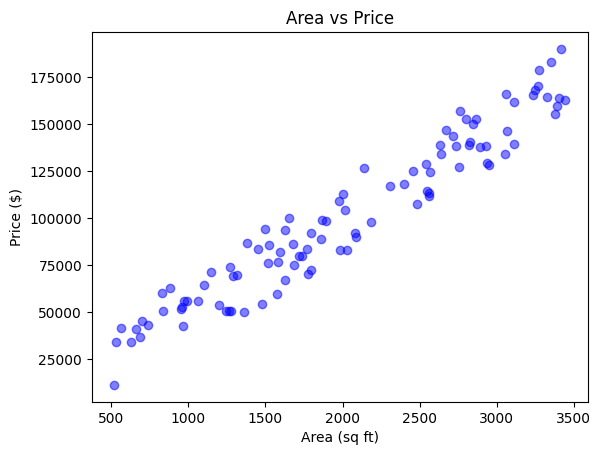

In [5]:
# step 3 visualize the original data
plt.scatter(data['Area'], data['Price'], color='blue', alpha=0.5)
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.show()


In [6]:
# 4. # Split into features (X) and target (y)
X = data[['Area']]  # Independent variable
y = data['Price']   # Dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 5 # Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# 6.# Predict on test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 156532063.84725165
R-squared: 0.9157017416403224


c:\Users\Owner\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


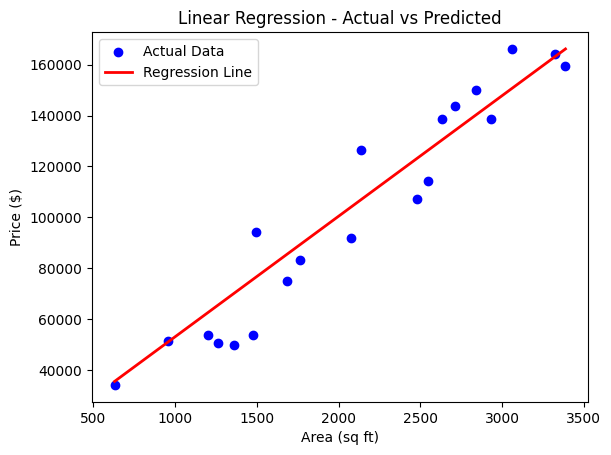

In [10]:
# 7. plt.scatter(X_test, y_test, color='blue', label='Actual')
# Scatter plot of actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Generate a range of values for a smooth regression line
x_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Plot the regression line
plt.plot(x_line, y_line, color='red', label='Regression Line', linewidth=2)

# Add title and labels
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()



In [12]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [14]:
# 8.# Predict the price of a house with 2000 sq ft area
sample_area = [[4000]]
predicted_price = model.predict(sample_area)

print(f"Predicted Price for 2000 sq ft: ${predicted_price[0]:.2f}")


Predicted Price for 2000 sq ft: $195146.81


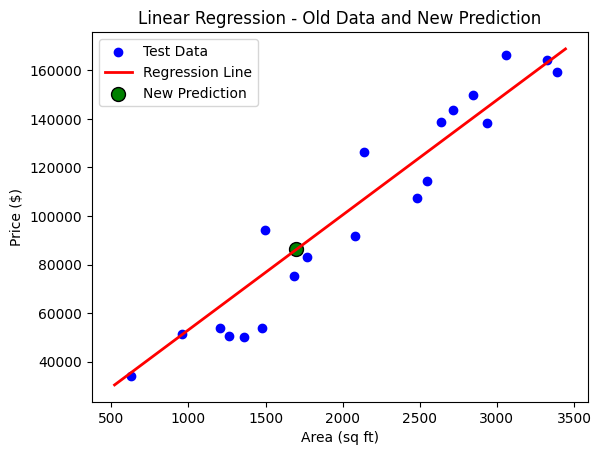

Predicted price for a house with area 1700 sq ft: $86219.94


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
area = np.random.randint(500, 3500, 100)  # Square footage
price = area * 50 + np.random.randint(-20000, 20000, 100)  # Price with noise
data = pd.DataFrame({'Area': area, 'Price': price})

# Step 2: Split data into train and test sets
X = data[['Area']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Generate predictions
y_pred = model.predict(X_test)

# Step 5: Predict for a new data point
new_area = np.array([[1700]])  # Example: New data point for area
new_price = model.predict(new_area)

# Step 6: Visualization
# Scatter plot of test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Regression line using the range of X values
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Regression Line', linewidth=2)

# Mark the new data point
plt.scatter(new_area, new_price, color='green', label='New Prediction', s=100, edgecolor='black')

# Add labels and legend
plt.title('Linear Regression - Old Data and New Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Print new prediction
print(f"Predicted price for a house with area {new_area[0][0]} sq ft: ${new_price[0]:.2f}")


Summary

    Data Preparation: Created synthetic data for house prices based on area.
    Visualization: Explored the relationship between area and price using a scatter plot.
    Model Building: Trained a simple linear regression model using scikit-learn.
    Evaluation: Assessed model performance with Mean Squared Error and R-squared.
    Visualization: Plotted actual vs. predicted data points.
    Prediction: Used the model to predict new data.

# Multiple linear regression

In [18]:
# step 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
# 2 load datset
# Generate synthetic data
np.random.seed(42)

# Features
area = np.random.randint(500, 3500, 100)  # Square footage
bedrooms = np.random.randint(1, 5, 100)  # Number of bedrooms
age = np.random.randint(1, 30, 100)  # Age of the house in years

# Target (Price)
price = area * 50 + bedrooms * 10000 - age * 300 + np.random.randint(-20000, 20000, 100)

# Create a DataFrame
data = pd.DataFrame({
    'Area': area,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})

# Display the first few rows
print(data.head())


   Area  Bedrooms  Age   Price
0  1360         4   28  117104
1  1794         4   25  104002
2  1630         4    7  107555
3  1595         3    1   97570
4  2138         3    1  155984


In [20]:
# 3. Splitthe data
# Features (X) and Target (y)
X = data[['Area', 'Bedrooms', 'Age']]  # Multiple features
y = data['Price']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# step 4 train the data
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   51.85176362 11435.80248666  -247.92018481]
Intercept: -9572.888532081415


In [22]:
# 5. evaluate the model
# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 212193768.37
R-squared: 0.91


In [23]:
# 6predict new data
# Predict for a new house
new_data = np.array([[2500, 3, 10]])  # Area: 2500 sq ft, Bedrooms: 3, Age: 10 years
predicted_price = model.predict(new_data)

print(f"Predicted price for the house: ${predicted_price[0]:.2f}")


Predicted price for the house: $151884.73


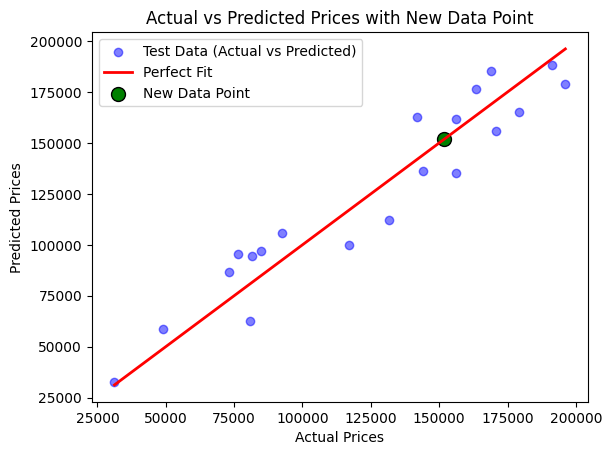

New Data Point: Predicted Price = $151884.73


In [25]:
# visualize the new data
# Scatter plot: Actual vs Predicted Prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Test Data (Actual vs Predicted)')

# Plot: Perfect fit line (y = x) for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')

# Add the new data point to the visualization
plt.scatter(
    predicted_price, predicted_price,  # New point (projected onto y=x for visualization)
    color='green', s=100, label='New Data Point', edgecolor='black'
)

# Add title and labels
plt.title('Actual vs Predicted Prices with New Data Point')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Print the new data point details for reference
print(f"New Data Point: Predicted Price = ${predicted_price[0]:.2f}")



Summary

    Features: Included Area, Bedrooms, and Age as predictors.
    Model: Built and trained a Multiple Linear Regression model.
    Evaluation: Used Mean Squared Error and R-squared to assess performance.
    Prediction: Predicted the price for a new house with specific features.
    Visualization: Compared actual vs. predicted prices using a scatter plot.